# Showcase Notebook - Advanced Programming for Data Science

Davide Rebuzzini - 59139

Leonardo Heinemann - 60384

Markus Giebrecht - 59699

Michel Oeding-Erdel - 59004

This notebook is intended to showcase the `Flights` class. This is done through a fictional storyline and use case that demonstrates the class's functionality and the insights it can provide. The storyline is divided into two parts, with each part focusing on different aspects of the class and the data it handles.

## Imports

The following code cell contains the necessary imports for the notebook. Please read the documentation and classes' docstrings for more information on the all functionalities.

In [2]:
# Importing the necessary modules and class
import unittest

from Class.flights_class_20 import Flights
from Class.unittest_class import TestDistanceCalculator


### API Key
For secure and efficient use of the OpenAI API within our project, we recommend storing the API key in an environment variable. To achieve this, please follow these steps:

1. Create a .env file in project's main directory.
2. Add your API key to this file as follows:

OPENAI_API_KEY=your_api_key_here

Replace your_api_key_here with your actual OpenAI API key.

Please note that our .gitignore file includes the .env entry, ensuring your API key remains secure and is not at risk of being accidentally committed to version control.

## Flights Class - Introduction

The `Flights` class is a powerful tool for managing and analyzing flight data. It integrates datasets on airports, airlines, flight routes, and aircraft, providing a robust tool for aviation analysis. With support for pandas and GeoPandas, the class facilitates data manipulation and visualization, including plotting airport locations, flight routes, and aircraft usage. Users can easily download and process flight data, explore route distributions, and assess aircraft usage. Key features include distance calculations, visualizations of distance distributions, and detailed markdown reports on aircraft and airports. Thereby, it even incorporates OpenAI's language models, which support the analysis with detailed descriptions and specifications.

In [3]:
# Creating an instance of the Flights class
flights_instance = Flights()

## Fictional Use Case - "Studying the Market"

We will utilize the **Flights** class to explore the aviation landscape and support a client’s new airline venture. 

In `Part 1`, our primary objective is to assess the viability of London Heathrow (LHR) as the main hub for the airline by examining route lengths and their distribution from this major airport. This analysis will help determine how LHR compares with other airports in terms of flight distances and connectivity. Additionally, we will try to understand the best placement for two secondary hubs in Europe, focusing on Germany and Italy. The **Flights** class will assist in mapping the distribution of airports in these countries, providing insights for optimal hub placement. Eventually, we will analyze the aircraft usage to recommend the most suitable plane models for their routes.

In `Part 2`, we will delve into the sustainability aspect of the airline industry, focusing on Germany. By comparing the C02 emissions of flights and train rides, we aim to provide insights into the environmental impact of short-haul flights within the country. The **Flights** class will be instrumental in visualizing the distribution of short- and long-haul flights within Germany, enabling a comprehensive sustainability analysis for the airline’s operations

## Part 1 - Hubs, Routes and Aircrafts

### Main Hub selection and Route Analysis
Let's understand which are the longest and shortest routes from London Heathrow airport and the distribution of routes length from the airport.

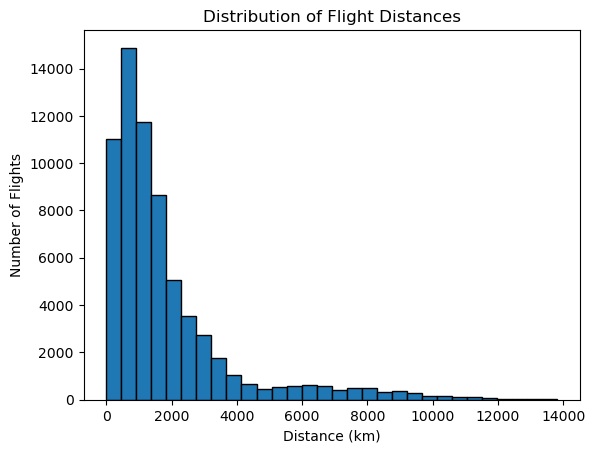

In [3]:
# Plotting the distribution of distances for all routes
distance_distribution_fig = flights_instance.distance_analysis()

The distribution of distances for all routes is plotted. The plot shows that there are way more
instances for short routes than for long routes.

Let's proceed and check the routes departing from London Heathrow.

/Users/markusgiesbrecht/Documents/Markus/Uni/Business_Analytics/2.Semester/Advanced_Programming/adpro_group_20/Class/flights_class_20.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.routes['Distance'] = None


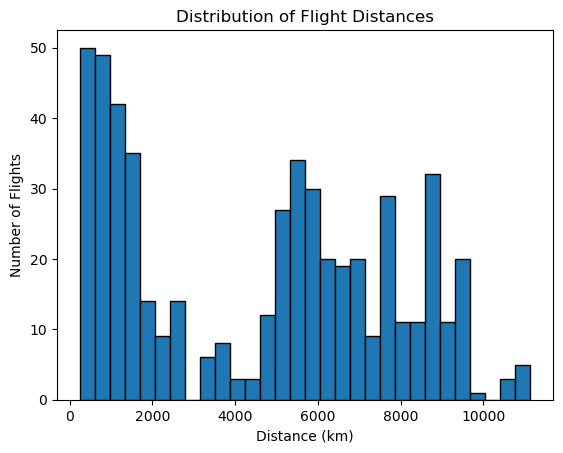

In [4]:
# Save the original state of the routes attribute
original_routes = flights_instance.routes

# Filter routes departing from the 'LHR' airport using the same instance
flights_LHR = flights_instance.routes[flights_instance.routes['Source airport'] == 'LHR']
flights_instance.routes = flights_LHR  # temporarily set the routes attribute of the instance to the filtered routes
flights_instance.distance_analysis()

# Reset the routes attribute to its original state
flights_instance.routes = original_routes

The plot shows a different distribution from the one covering all flights in the dataset. The plot doesn't highlight any particular distribution of distances from Heathrow. Yet, have a slight higher concentration of shorter flights.

Let's not only focus on the distances but also the globally available destinations from Heathrow.

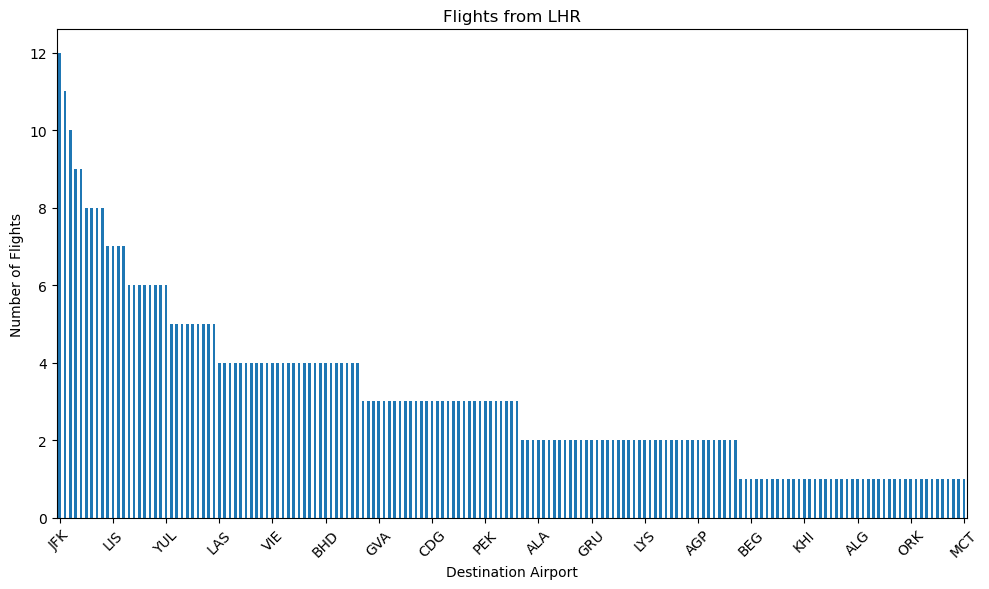

In [5]:
# Call the plot_flight_routes() method on the instance
lhr_fig = flights_instance.plot_flight_routes('LHR')  

Notably, the airport with the highest number of flights is JFK, indicating a strong connection between LHR and New York. The distribution of flights across other destinations shows a wide range of international reach, with airports like CDG (Paris), PEK (Beijing), and GRU (São Paulo) included, highlighting Heathrow's role as a major international hub.

### Aiport Locations and Internationalization

Focusing on Germany and Italy, let's try to understand where two secondary hubs could be placed. Let's check on the distribution of the airports in both countries.

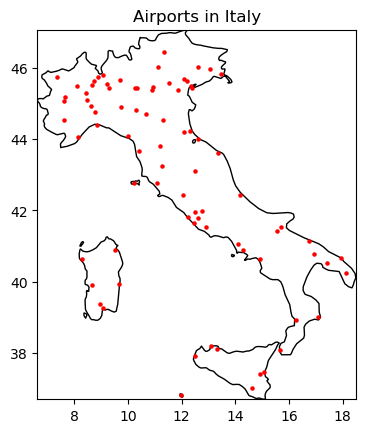

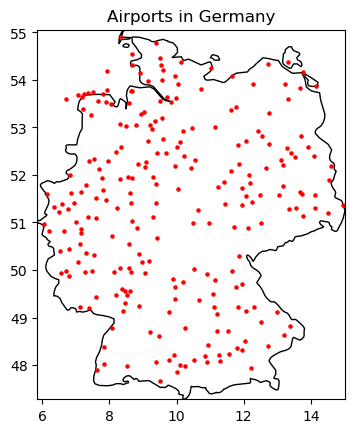

In [6]:
# Plot a map with all the airports in Italy
italy_fig = flights_instance.plot_airports('Italy')

# Plot a map with all the airports in Germany
germany_fig = flights_instance.plot_airports('Germany')

We can immediately notice how italian airports are much more concentrated in the northern part of the country. On the other hand, German airports are more evenly distributed, even though a cluster might be visible in the northwestern part.

Let's find out more about two of the main airports of each country, namely **Frankfurt am Main  Airport** as Germanys biggest airport and **Milano Linate Airport** as the biggest airport in northern Italy. Lets show some information about the two airports.

In [9]:
# Frankfurt Airport (FRA) 
fra = flights_instance.airport_info('Frankfurt am Main Airport')
milan = flights_instance.airport_info('Milano Linate Airport')

fra

Exception: OpenAI API key not found. Please set the OPENAI_API_KEY environment variable.

In [8]:
milan

| Aspect              | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| Location            | Milan, Italy                                                                |
| IATA code           | LIN                                                                         |
| Runways             | 1                                                                           |
| Terminal buildings  | 1                                                                           |
| Airlines            | Various airlines operate at the airport, including Alitalia and Lufthansa  |
| Destinations        | Domestic and international flights to various cities in Europe             |
| Facilities          | Duty-free shops, restaurants, car rental services, VIP lounges             |
| Transportation      | Bus and taxi services available for transportation to and from the airport  |
| Parking             | Short-term and long-term parking options available                         |
| Wi-Fi               | Free Wi-Fi available throughout the airport                                 |
| Accessibility       | Facilities for passengers with reduced mobility                            |
| Lounges             | Business lounges available for passengers with access                       |

### Aircraft Models

After advising the founders on where and how they could open their new hubs, we should now make sure they select the right types of aircraft!

Let's show the most used aircraft models in Italy, Germany, and the UK.

/var/folders/k4/_w824cfn3v12mdxqlv8kc17r0000gn/T/ipykernel_50924/4156324738.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  italy_aircraft.show()
/var/folders/k4/_w824cfn3v12mdxqlv8kc17r0000gn/T/ipykernel_50924/4156324738.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  germany_aircraft.show()
/var/folders/k4/_w824cfn3v12mdxqlv8kc17r0000gn/T/ipykernel_50924/4156324738.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  uk_aircraft.show()


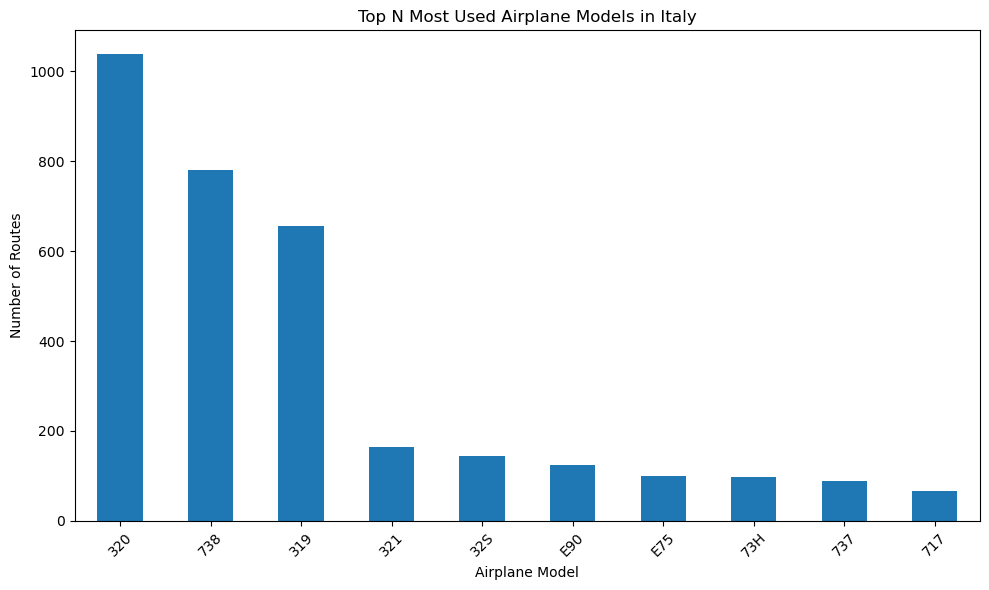

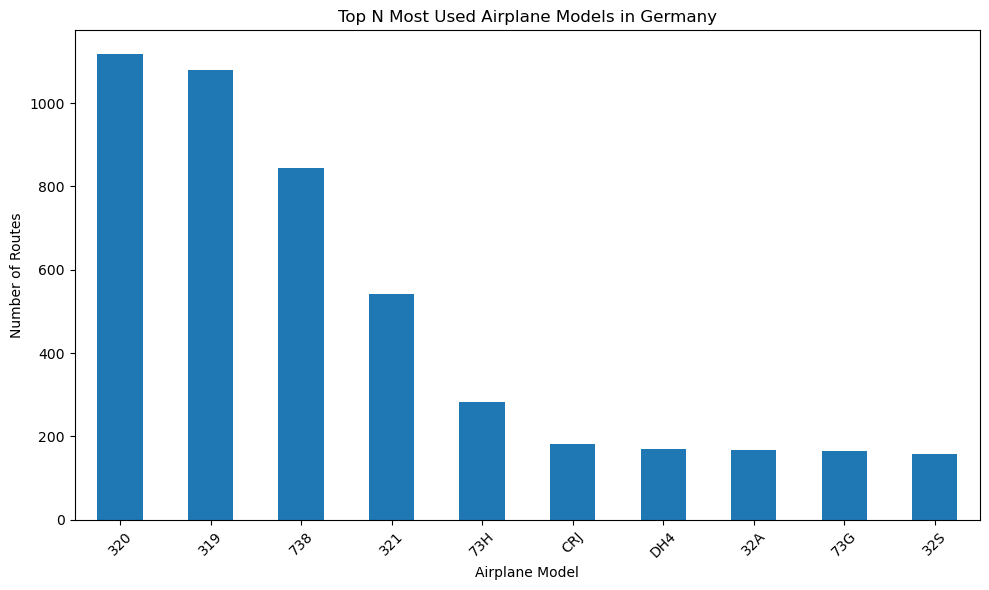

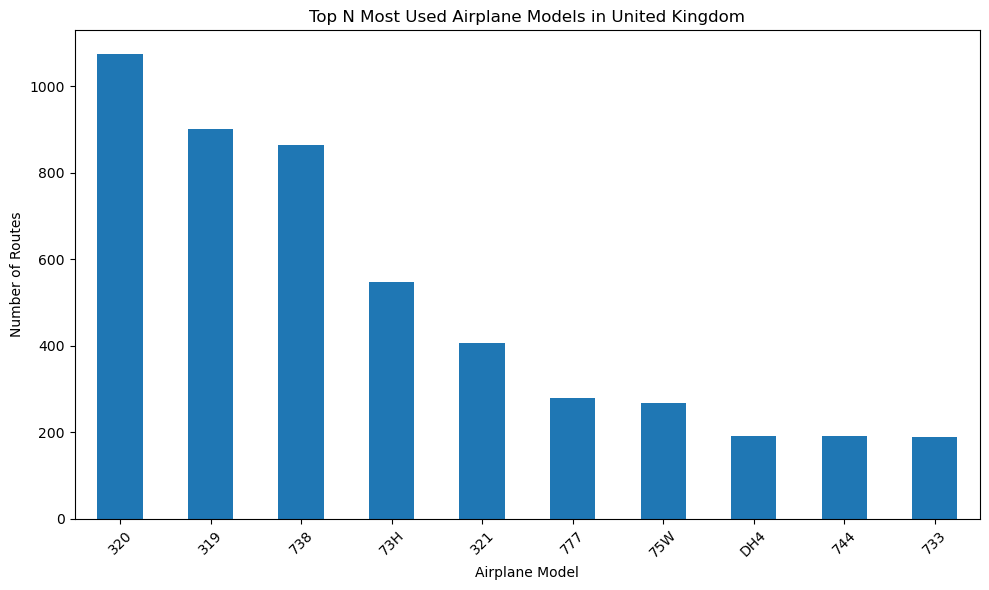

In [9]:
italy_aircraft = flights_instance.plot_most_used_airplane_models('Italy')
italy_aircraft.show() 

# Find the most used aircraft in Germany
germany_aircraft = flights_instance.plot_most_used_airplane_models('Germany')
germany_aircraft.show()

# Find the most used aircraft in the UK
uk_aircraft = flights_instance.plot_most_used_airplane_models('United Kingdom')
uk_aircraft.show()

The most used aircarft in UK, Italy and Germany is the A320, followed by the B738 in Italy and  the
A319 in Germany and the UK.  Let's show some information about the Airbus A320.

In [4]:
# Airbus A320
flights_instance.aircraft_info('Airbus A320')

Exception: OpenAI API key not found. Please set the OPENAI_API_KEY environment variable.

# Part 2 - Sustainability Analysis

After selecting hubs and aircrafts, let's start making an analysis about countries on how sustainable their flight economy is. 

**Let's focus on Germany!**

In order to develop an accurate analysis we need to accurately pick our sources:

Source for ratio of C02 Emission Comparison: Flight <-> Train: https://ourworldindata.org/travel-carbon-footprint

Source for C02 Emission for Flight per passenger: https://theicct.org/publication/co2-emissions-from-commercial-aviation-2013-2018-and-2019/

**The KPI used for the sustainability analysis is going to be the emission differential between airplane and train trips.**

We selected all the short-haul flights within Germany (in our case all flights), considering the train as a viable alternative for this kind of short internal routes. We then calculated the amount of C02 per passenger produced by those flights and compared it to the amount produced by the same train rides.


The comparison shows that by substituting all short haul flights with train rides, Germany could reduce its C02 emissions by an equivalent of 2.42 tonnes!!



No long-haul flights to plot.


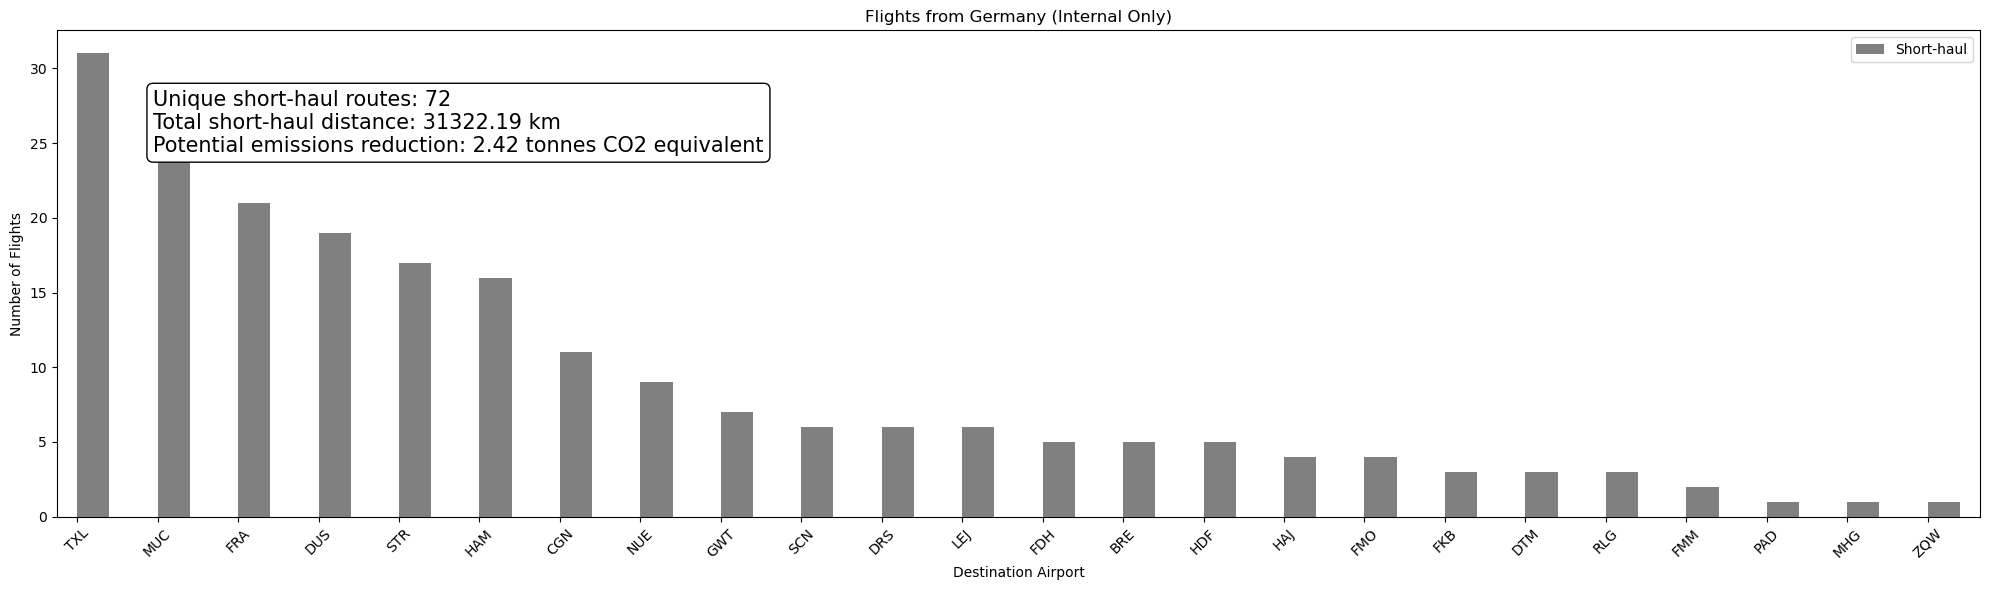

In [11]:
# Visualising the distribution of short- and long-haul flights within Germany 

# Call the plot_flights_by_country() method on the instance
germany_carbon_internal = flights_instance.plot_flights_by_country('Germany', internal=True)

The number of short and long haul flights inside  airports are plotted above. 
The plot shows that for every airport in Germany for inland flights,
there are no long-haul flights within Germany.

**We can now show a comparison including all flights, both internal and external/international, from Germany.**

/Users/markusgiesbrecht/Documents/Markus/Uni/Business_Analytics/2.Semester/Advanced_Programming/adpro_group_20/Class/flights_class_20.py:763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_haul_flights['Route'] = short_haul_flights.apply(
/Users/markusgiesbrecht/Documents/Markus/Uni/Business_Analytics/2.Semester/Advanced_Programming/adpro_group_20/Class/flights_class_20.py:766: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_haul_flights['route_id'] = short_haul_flights.apply(


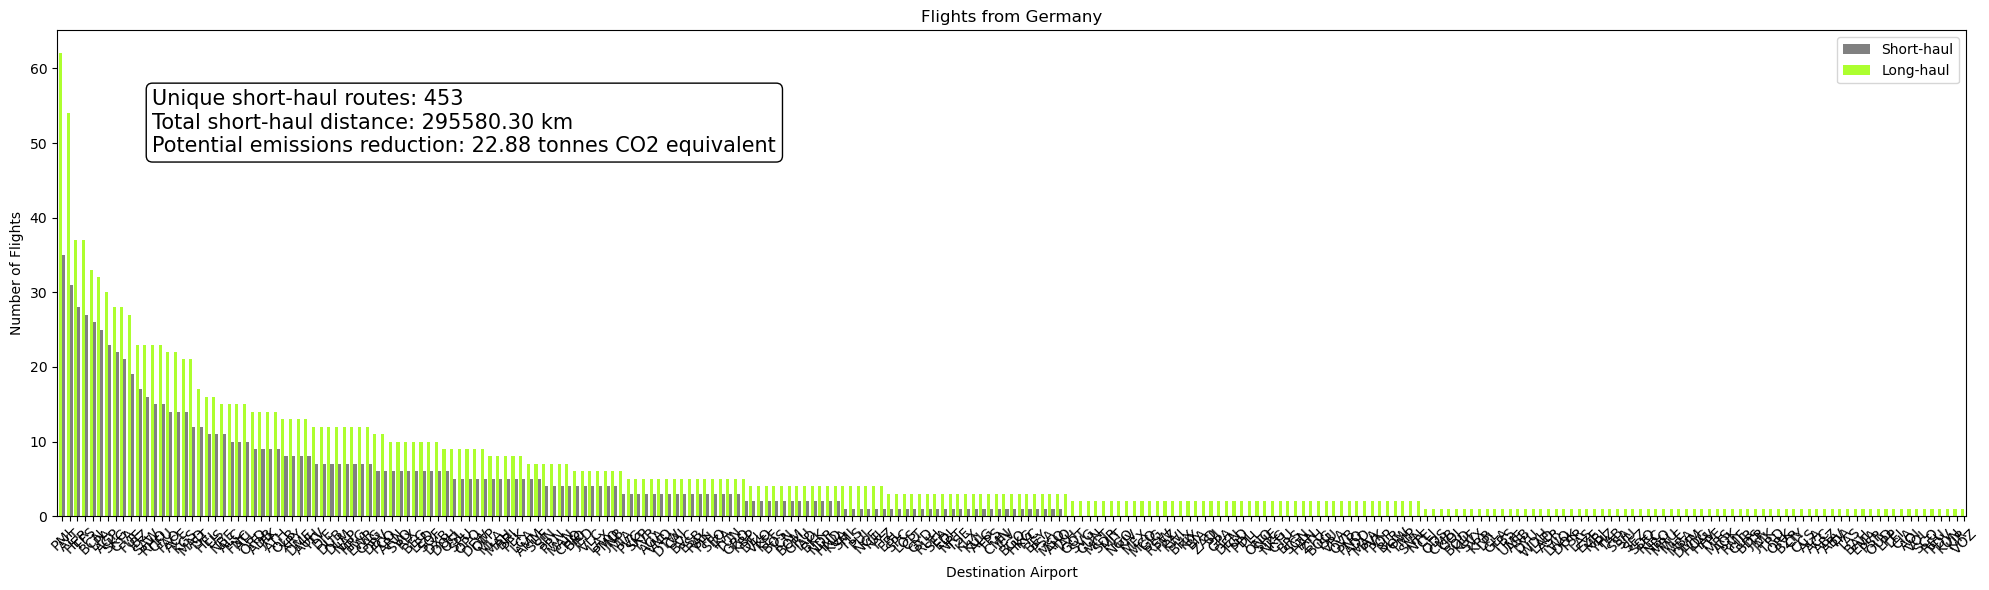

In [12]:
germany_carbon_all = flights_instance.plot_flights_by_country('Germany', internal=False)

For internal and external flights, the plot shows that the number of short-haul flights is higher than the number of long-haul flights. This further supports the massive emissions reduction that could be achieved by substituting short-haul flights with train rides.

### Checking the Results

Let's have a few final tests to verify the information.

In [13]:
if __name__ == '__main__':
    # Create a test suite
    suite = unittest.TestLoader().loadTestsFromTestCase(TestDistanceCalculator)
    
    # Create a test runner
    runner = unittest.TextTestRunner()
    
    # Run the tests
    result = runner.run(suite)


...
----------------------------------------------------------------------
Ran 3 tests in 21.457s

OK
